In [294]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
# import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

In [2]:
d2l=mxd2l

In [3]:
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt','090b5e7e70c295757f55df93cb0a180b9691891a')

In [5]:
# d2l.DATA_HUB

In [6]:
lines = d2l.read_time_machine()
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the


In [19]:
line=lines[0]

In [20]:
line

'the time machine by h g wells'

In [21]:
[line.split()]

[['the', 'time', 'machine', 'by', 'h', 'g', 'wells']]

In [22]:
# list(line)

In [23]:
list('我使用汉语 我是中国人')

['我', '使', '用', '汉', '语', ' ', '我', '是', '中', '国', '人']

In [24]:
tokens = d2l.tokenize(lines)

In [25]:
len(tokens),len(tokens[0])

(3221, 7)

In [26]:
tokens[0]

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']

In [113]:
# tokens[1],tokens[2],tokens[10]

In [114]:
len(tokens)

3221

In [30]:
tks=tokens[0:10]

In [31]:
len(tks)

10

In [115]:
# [t for line in tks for t in line]

In [37]:
# tks

In [116]:
# [token for line in tks for token in line]

In [117]:
# [c for line in tks for token in line for c in list(token)]

In [118]:
# [c for line in tks for token in line for c in token]

In [119]:
a=[['tokens'],['only','you'],['中国人','合肥']]

In [120]:
[c for item in a for word in item for c in word]

['t',
 'o',
 'k',
 'e',
 'n',
 's',
 'o',
 'n',
 'l',
 'y',
 'y',
 'o',
 'u',
 '中',
 '国',
 '人',
 '合',
 '肥']

In [121]:
len(tokens)

3221

In [122]:
corpus=[token for line in tokens for token in line]

In [123]:
len(corpus)

32775

In [124]:
vocab=d2l.Vocab(corpus)

In [125]:
len(vocab),len(vocab.token_freqs)

(4580, 4579)

In [126]:
# vocab??

In [79]:
v=vocab.token_freqs[0:50]
v

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440),
 ('it', 437),
 ('had', 354),
 ('me', 281),
 ('as', 270),
 ('at', 243),
 ('for', 221),
 ('with', 216),
 ('but', 204),
 ('time', 200),
 ('were', 158),
 ('this', 152),
 ('on', 137),
 ('you', 137),
 ('then', 134),
 ('his', 129),
 ('there', 127),
 ('he', 123),
 ('from', 122),
 ('have', 122),
 ('they', 122),
 ('one', 120),
 ('all', 118),
 ('into', 114),
 ('not', 114),
 ('little', 113),
 ('upon', 113),
 ('so', 112),
 ('is', 106),
 ('came', 105),
 ('by', 103),
 ('some', 94),
 ('be', 93),
 ('could', 92),
 ('no', 92),
 ('their', 91),
 ('said', 89),
 ('saw', 88),
 ('down', 87),
 ('them', 86),
 ('machine', 85)]

In [70]:
ll=[x[1] for x in vocab.token_freqs]

In [71]:
len(ll)

4579

In [74]:
sum(ll)

32775

In [75]:
freqs =ll

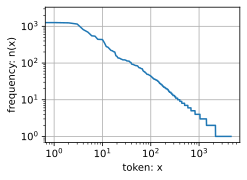

In [76]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')

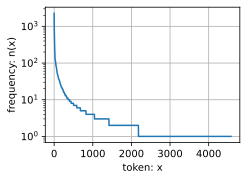

In [77]:
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         yscale='log')

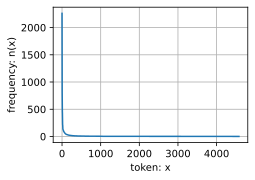

In [78]:
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)')

In [83]:
trigram_tokens = [triple for triple in zip(corpus[:-2], corpus[1:-1],corpus[2:])]

In [84]:
# list(zip(corpus[:-2], corpus[1:-1],corpus[2:]))

In [85]:
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('here', 'and', 'there'), 15),
 (('it', 'was', 'a'), 15),
 (('i', 'did', 'not'), 14),
 (('seemed', 'to', 'me'), 14),
 (('i', 'began', 'to'), 13),
 (('i', 'saw', 'the'), 13)]

In [94]:
# trigram_vocab.token_freqs[29000:]

In [127]:
len(trigram_vocab.token_freqs)

29882

In [128]:
# d2l.Vocab??

In [131]:
len(corpus)

32775

In [132]:
batch_size=2
num_steps=5

In [133]:
import random
start=random.randint(0, num_steps)
start

2

In [134]:
corpus_sampled = corpus[start:]

In [135]:
len(corpus_sampled)

32773

In [137]:
num_subseqs = (len(corpus_sampled) - 1) // num_steps
num_subseqs

6554

In [138]:
6554*5

32770

In [139]:
initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
initial_indices[0:5]

[0, 5, 10, 15, 20]

In [141]:
initial_indices[-1]

32765

In [142]:
random.shuffle(initial_indices)

In [143]:
initial_indices[0:5],initial_indices[-1]

([19305, 8060, 30605, 18870, 25680], 28995)

In [144]:
pos=initial_indices[-1]

In [148]:
corpus_slice=corpus[pos: pos + num_steps]
len(corpus_slice)

5

In [149]:
corpus_slice

['it', 'had', 'for', 'a', 'little']

In [153]:
num_subseqs,batch_size

(6554, 2)

In [151]:
num_subseqs_per_example = num_subseqs // batch_size
num_subseqs_per_example

3277

In [155]:
a=list(range(0, batch_size * num_subseqs_per_example, batch_size))

In [157]:
len(a),batch_size * num_subseqs_per_example

(3277, 6554)

In [158]:
list(range(0, 6, 2))

[0, 2, 4]

In [159]:
initial_indices_per_batch = initial_indices[3: 3 + batch_size]

In [160]:
initial_indices_per_batch

[18870, 25680]

In [161]:
def data(pos):
        # Return a sequence of length `num_steps` starting from `pos`
        return corpus[pos: pos + num_steps]

In [162]:
X = [data(j) for j in initial_indices_per_batch]

In [164]:
X

[['unaided', 'efforts', 'and', 'the', 'thought'],
 ['quite', 'still', 'it', 'was', 'time']]

In [165]:
Y = [data(j + 1) for j in initial_indices_per_batch]
Y

[['efforts', 'and', 'the', 'thought', 'of'],
 ['still', 'it', 'was', 'time', 'for']]

In [235]:
my_seq = list(range(55))

In [236]:
str(my_seq)

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]'

In [237]:
" ".join(str(i) for i in my_seq)

'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54'

In [238]:
stri=[str(i) for i in my_seq]

In [239]:
" ".join(stri)

'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54'

In [252]:
batch_size=3;num_steps=5

In [253]:
mynum_subs=(len(my_seq)-1)//num_steps
mynum_subs

10

In [254]:
my_start=random.randint(0,num_steps)
my_start

2

In [255]:
my_seq_s=my_seq[my_start:]

In [256]:
str(my_seq_s)

'[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]'

In [257]:
sub_start=list(range(0,num_steps*mynum_subs,num_steps))
str(sub_start)

'[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]'

In [258]:
subs_per_batch=mynum_subs//batch_size
subs_per_batch

3

In [259]:
subs_per_batch*batch_size

9

In [260]:
batch_start=list(range(0,subs_per_batch*batch_size,subs_per_batch))
batch_start

[0, 3, 6]

In [261]:
2*5*3

30

In [262]:
def data(pos):
        # Return a sequence of length `num_steps` starting from `pos`
        return my_seq_s[pos: pos + num_steps]


In [263]:
for i in batch_start:
    initial_indices_per_batch = sub_start[i:i+batch_size]
    x=[data(j) for j in initial_indices_per_batch]
    y=[data(j+1) for j in initial_indices_per_batch]
    print("x=",x,"\ny=",y)
    print("-------------")

x= [[2, 3, 4, 5, 6], [7, 8, 9, 10, 11], [12, 13, 14, 15, 16]] 
y= [[3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
-------------
x= [[17, 18, 19, 20, 21], [22, 23, 24, 25, 26], [27, 28, 29, 30, 31]] 
y= [[18, 19, 20, 21, 22], [23, 24, 25, 26, 27], [28, 29, 30, 31, 32]]
-------------
x= [[32, 33, 34, 35, 36], [37, 38, 39, 40, 41], [42, 43, 44, 45, 46]] 
y= [[33, 34, 35, 36, 37], [38, 39, 40, 41, 42], [43, 44, 45, 46, 47]]
-------------


### 1、 随机生成[0，num_steps）之间的随机数，为子序列（subseq）的构造增加随机性。其中num_steps也可理解为子序列的长度
### 2、 计算子序列总数（num_subseqs）和总批次数（num_batches）
### 3、 计算所有子序列的起始下标（start_idx_of_subseqs）
### 4、 生成所有batch（及每个batch中的所有子序列（subseq））：
####    --1）生成所有batch的起始位置
####    --2）找出一个batch中字句的起始位置


In [359]:
def seq_data_iter_random(corpus, batch_size, num_steps):
    
    r_offset=random.randint(0,num_steps) # # Start with a random offset to partition a sequence
    print(f'random_offset={r_offset}')
    r_corpus=corpus[r_offset:]
    #num_subseqs
    num_subseqs =(len(r_corpus)-1)//num_steps
    #num_subseqs_per_example 
    num_batches=num_subseqs//batch_size
    
    # The starting indices for subsequences of length `num_steps`
    start_idx_of_subseqs=list(range(0,num_subseqs*num_steps,num_steps))
    print(f'len(start_idx_of_subseqs):{len(start_idx_of_subseqs)}  --{str(start_idx_of_subseqs[0:10])} 需加上random_offset --{r_offset} ')
    print(f'   batch_size*num_batches:{batch_size*num_batches}')
    
    random.shuffle(start_idx_of_subseqs) 
    
    def data(pos):
        # Return a sequence of length `num_steps` starting from `pos`
        return r_corpus[pos: pos + num_steps]
    
    start_idx_of_batch_list=list(range(0,batch_size*num_batches,batch_size))
    print(f'  start_idx_of_batch_list:   --{str(start_idx_of_batch_list[0:10])} for start_idx_of_subseqs')
    for i in range(0,batch_size*num_batches,batch_size):
        initial_indices_per_batch = start_idx_of_subseqs[i:i+batch_size]
        print(f"\n---initial_indices_per_batch:{initial_indices_per_batch}需加上random_offset --{r_offset} ")
        X=[data(j) for j in initial_indices_per_batch]
        Y=[data(j+1) for j in initial_indices_per_batch]
        yield mxnp.array(X), mxnp.array(Y)     
    

In [358]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=6):
    print('X:\n', X, '\nY:\n', Y)

random_offset=4
len(start_idx_of_subseqs):5  --[0, 6, 12, 18, 24] 需加上random_offset --4 
   batch_size*num_batches:4
  start_idx_of_batch_list:   --[0, 2] for start_idx_of_subseqs

---initial_indices_per_batch:[0, 6]需加上random_offset --4 
X:
 [[ 4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15.]] 
Y:
 [[ 5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16.]]

---initial_indices_per_batch:[12, 18]需加上random_offset --4 
X:
 [[16. 17. 18. 19. 20. 21.]
 [22. 23. 24. 25. 26. 27.]] 
Y:
 [[17. 18. 19. 20. 21. 22.]
 [23. 24. 25. 26. 27. 28.]]


## Sequential Partitioning

In [361]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):
    r_offset=random.randint(0,num_steps) ## Start with a random offset to partition a sequence
    print(f'random_offset={r_offset}')
    num_tokens = ((len(corpus) - r_offset - 1) // batch_size) * batch_size
    Xs = mxnp.array(corpus[    r_offset: r_offset + num_tokens])
    Ys = mxnp.array(corpus[r_offset + 1: r_offset + num_tokens + 1])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_batches * num_steps, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [362]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X:\n', X, '\nY:\n', Y)

random_offset=2
X:
 [[ 2.  3.  4.  5.  6.]
 [18. 19. 20. 21. 22.]] 
Y:
 [[ 3.  4.  5.  6.  7.]
 [19. 20. 21. 22. 23.]]
X:
 [[ 7.  8.  9. 10. 11.]
 [23. 24. 25. 26. 27.]] 
Y:
 [[ 8.  9. 10. 11. 12.]
 [24. 25. 26. 27. 28.]]
X:
 [[12. 13. 14. 15. 16.]
 [28. 29. 30. 31. 32.]] 
Y:
 [[13. 14. 15. 16. 17.]
 [29. 30. 31. 32. 33.]]


In [360]:
# d2l.load_data_time_machine??

In [409]:
class SeqDataLoader:
    def __init__(self,bs,num_steps,use_random_iter,max_tokens,corpus=None):
        if use_random_iter:
            self.data_iter_fn=mxd2l.seq_data_iter_random
        else:
            self.data_iter_fn=mxd2l.seq_data_iter_sequential
        if corpus:
            self.corpus,self.vocab=corpus,None
        else:
            self.corpus,self.vocab=mxd2l.load_corpus_time_machine(max_tokens)  ### 
        
        self.bs=bs
        self.num_steps=num_steps
    def __iter__(self):
        data_iter=self.data_iter_fn(self.corpus,self.bs,self.num_steps)
        return data_iter            

In [481]:
def load_data_time_machine(batch_size, num_steps, use_random_iter=False, max_tokens=10000,corpus=None):
    """Return the iterator and the vocabulary of the time machine dataset."""
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter, max_tokens,corpus=corpus)
    return data_iter, data_iter.vocab

In [482]:
data_iter,vocab=load_data_time_machine(64, 15, use_random_iter=False, max_tokens=10000)

In [488]:
my_seq = list(range(65))
data_iter,vocab=load_data_time_machine(4, 5, use_random_iter=False,corpus=my_seq)
list(iter(data_iter))

[(array([[ 1.,  2.,  3.,  4.,  5.],
         [16., 17., 18., 19., 20.],
         [31., 32., 33., 34., 35.],
         [46., 47., 48., 49., 50.]]),
  array([[ 2.,  3.,  4.,  5.,  6.],
         [17., 18., 19., 20., 21.],
         [32., 33., 34., 35., 36.],
         [47., 48., 49., 50., 51.]])),
 (array([[ 6.,  7.,  8.,  9., 10.],
         [21., 22., 23., 24., 25.],
         [36., 37., 38., 39., 40.],
         [51., 52., 53., 54., 55.]]),
  array([[ 7.,  8.,  9., 10., 11.],
         [22., 23., 24., 25., 26.],
         [37., 38., 39., 40., 41.],
         [52., 53., 54., 55., 56.]])),
 (array([[11., 12., 13., 14., 15.],
         [26., 27., 28., 29., 30.],
         [41., 42., 43., 44., 45.],
         [56., 57., 58., 59., 60.]]),
  array([[12., 13., 14., 15., 16.],
         [27., 28., 29., 30., 31.],
         [42., 43., 44., 45., 46.],
         [57., 58., 59., 60., 61.]]))]

In [475]:
# vocab.token_freqs

In [476]:
# vocab.token_to_idx

In [477]:
# next(iter(data_iter))

In [487]:
for x,y in data_iter:
    print(x[0],"\n   ",y[0])
    #break

[5. 6. 7. 8. 9.] 
    [ 6.  7.  8.  9. 10.]
[10. 11. 12. 13. 14.] 
    [11. 12. 13. 14. 15.]


In [479]:
vocab.idx_to_token[5]

AttributeError: 'NoneType' object has no attribute 'idx_to_token'

In [480]:
list(iter(data_iter))

[(array([[ 1.,  2.,  3.,  4.,  5.],
         [16., 17., 18., 19., 20.],
         [31., 32., 33., 34., 35.],
         [46., 47., 48., 49., 50.]]),
  array([[ 2.,  3.,  4.,  5.,  6.],
         [17., 18., 19., 20., 21.],
         [32., 33., 34., 35., 36.],
         [47., 48., 49., 50., 51.]])),
 (array([[ 6.,  7.,  8.,  9., 10.],
         [21., 22., 23., 24., 25.],
         [36., 37., 38., 39., 40.],
         [51., 52., 53., 54., 55.]]),
  array([[ 7.,  8.,  9., 10., 11.],
         [22., 23., 24., 25., 26.],
         [37., 38., 39., 40., 41.],
         [52., 53., 54., 55., 56.]])),
 (array([[11., 12., 13., 14., 15.],
         [26., 27., 28., 29., 30.],
         [41., 42., 43., 44., 45.],
         [56., 57., 58., 59., 60.]]),
  array([[12., 13., 14., 15., 16.],
         [27., 28., 29., 30., 31.],
         [42., 43., 44., 45., 46.],
         [57., 58., 59., 60., 61.]]))]